### начальные условия

In [1]:
gamma = 5/3
#N = 100
t_step = 1e-4
#T = 10
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation


### заполнение u, v, r, p, e   
{(t, n): value}

In [2]:
class genMap:
    def __init__(self, nmin, nmax, jmin, jmax, name):
        self.jmin = jmin
        self.jmax = jmax
        self.nmin = nmin
        self.nmax = nmax
        self.name = name
        self.arr = np.zeros((int(nmax - nmin + 1), int(jmax - jmin + 1)))
    def get(self, n, j):  # получить значение параматера в точке сетки
        return (self.arr[int(n - self.nmin), int(j - self.jmin)])
    def asg(self, n, j, val):  # присвоить значение параметру в точке сетки
        self.arr[int(n - self.nmin), int(j - self.jmin)] = val

In [3]:
def calc_all(N, T):
    m_step = 1/N
    Nstep = int(T / t_step)
    u = genMap(0.5, Nstep +.5, 0, N, 'u')
    v = genMap(0, Nstep +1, 0.5, N + .5, 'v')
    r = genMap(0, Nstep +1, 0, N + 1, 'r')
    p = genMap(0, Nstep +1, .5, N + .5, 'p')
    e = genMap(0, Nstep +1, .5, N + .5, 'e')
    #### заполнение r в начальный момент времени
    for i in range(1, N+2):
        r.asg(0, i, ((r.get(0, i-1))**3 + 1/N)**(1/3))
    #### заполнение p в начальный момент времени
    for i in range(1, N+1):
        p.asg(0, i - 0.5, 3 * (gamma - 1))
    #### заполнение $\varepsilon$ в начальный момент времени
    for i in range(1, N+1):
        e.asg(0, i - 0.5, 1)
    #### заполнение v в начальный момент времени
    for i in range(1, N+1):
        v.asg(0, i - 0.5, 1/3)
    ## Calculate
    for n in range(0, Nstep):
        if n != 0 and int(n * t_step) == n * t_step:
            print("time estimate:", int(n * t_step))
        if n != 0:
            for j in range(1, N):
                u.asg(n + 0.5, j, u.get(n-0.5, j) - t_step * (r.get(n, j)**2) * (p.get(n, j + 0.5) - p.get(n, j - 0.5))/m_step)
            u.asg(n + 0.5, N, u.get(n - 0.5, N)  + t_step * (r.get(n, N)**2) * p.get(n, N - 0.5)/m_step)
        for j in range(1, N+1):
            r.asg(n+1, j, r.get(n, j) + u.get(n + 0.5, j) * t_step)
        for j in range(1, N+1):
            v.asg(n + 1, j - 0.5, (r.get(n+1, j)**3 - r.get(n+1, j-1)**3)/(3*m_step))
        for j in range(1, N+1):
            tmp = (gamma - 1)*(v.get(n, j-0.5) - v.get(n+1, j - 0.5))/2
            e.asg(n+1, j - 0.5, e.get(n, j - 0.5) *(v.get(n+1, j - 0.5) / v.get(n, j - 0.5)) * (v.get(n, j - 0.5) + tmp)/(v.get(n+1, j - 0.5) - tmp))
        for j in range(1, N+1):
            p.asg(n+1, j - 0.5, (gamma - 1)*e.get(n+1, j - 0.5)/v.get(n+1, j - 0.5))
        
    print("Finsih N: " + str(N) + ", time: " + str(T), ", T step: ", Nstep)
    return({'N': N, 'T': T, 'u' : u, 'v' : v, 'r' : r, 'p' : p, 'e' : e, 'Nstep' : Nstep})

In [4]:
rs1 = calc_all(500, 10)
rs2 = calc_all(250, 10)


time estimate: 1
time estimate: 2
time estimate: 3
time estimate: 4
time estimate: 5
time estimate: 6
time estimate: 7
time estimate: 8
time estimate: 9
Finsih N: 500, time: 10 , T step:  100000
time estimate: 1
time estimate: 2
time estimate: 3
time estimate: 4
time estimate: 5
time estimate: 6
time estimate: 7
time estimate: 8
time estimate: 9
Finsih N: 250, time: 10 , T step:  100000


In [ ]:
rs3 = calc_all(100, 10)

In [155]:
# lst_rn = [int(tm / t_step) for tm in [1, 3, 5, 7.5, 9.9]]
lst_rn = [int(tm / t_step) for tm in [.5, 1.5, 2, 3, 4.9]]
def show_res(rs, lst_rn):
    N = rs['N']
    r = rs['r']
    u = rs['u']
    v = rs['v']
    p = rs['p']
    e = rs['e']
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.subplots_adjust(hspace = .5, wspace=.2)
    for n in lst_rn:
        axs[0, 0].plot([r.get(n, i) for i in range(N+1)], [u.get(n + .5, i) for i in range(N+1)], label = 't = ' + str(round(n * t_step, 2)))
    axs[0, 0].set_title('График зависимости $ u = u(r) $, N = ' + str(rs['N']), fontstyle = 'oblique', fontsize = 20)
    axs[0, 0].set_xlabel('$r$', fontsize = 20)
    axs[0, 0].set_ylabel('$u$',  fontsize = 20)
    axs[0, 0].legend()
    for n in lst_rn:
        axs[0, 1].plot([r.get(n, i) for i in range(1, N+1)], [v.get(n, i -.5) for i in range(1, N+1)],  label = 't = ' + str(round(n * t_step, 2)))
    axs[0, 1].set_title('График зависимости $ v = v(r) $, N = ' + str(rs['N']), fontstyle = 'oblique', fontsize = 20)
    axs[0, 1].set_xlabel('$r$', fontsize = 20)
    axs[0, 1].set_ylabel('$v$',  fontsize = 20)
    axs[0, 1].legend()
    for n in lst_rn:
        axs[1, 0].plot([r.get(n, i) for i in range(1, N+1)], [p.get(n, i - .5) for i in range(1, N+1)],  label = 't = ' + str(round(n * t_step, 2)))
    axs[1, 0].set_title('График зависимости $ p = p(r) $, N = ' + str(rs['N']), fontstyle = 'oblique', fontsize = 20)
    axs[1, 0].set_xlabel('$r$', fontsize = 20)
    axs[1, 0].set_ylabel('$p$',  fontsize = 20)
    axs[1, 0].legend()
    for n in lst_rn:
        axs[1, 1].plot([r.get(n, i) for i in range(1, N+1)], [e.get(n, i - .5) for i in range(1, N+1)],  label = 't = ' + str(round(n * t_step, 2)))
    axs[1, 1].set_title('График зависимости $ \epsilon = \epsilon(r) $ , N = ' + str(rs['N']), fontstyle = 'oblique', fontsize = 20)
    axs[1, 1].set_xlabel('$r$', fontsize = 20)
    axs[1, 1].set_ylabel('$\epsilon$',  fontsize = 20)
    axs[1, 1].legend()
    plt.savefig('C:/111/Dropbox/VitaZhik/study/MIPT/MASTER/ded/task1/profiles_' + str(rs['N']) + '_'+ str(max(lst_rn)))
    plt.show()

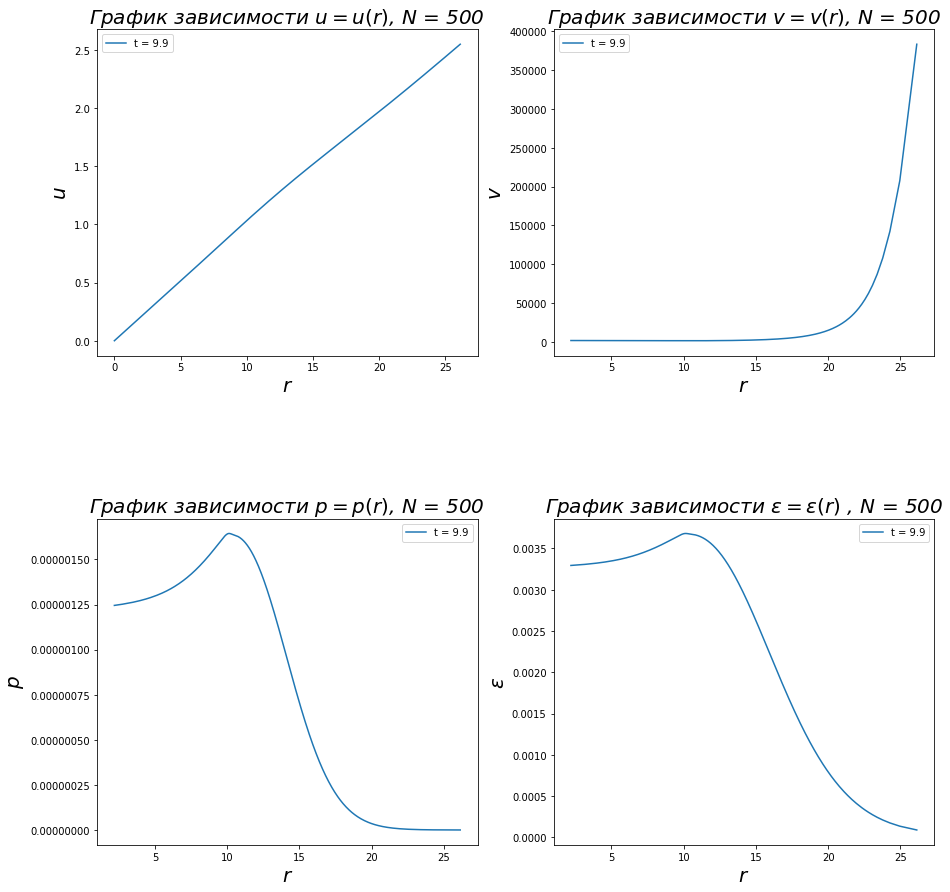

In [162]:
show_res(rs1, [int(tm / t_step) for tm in [9.9]])

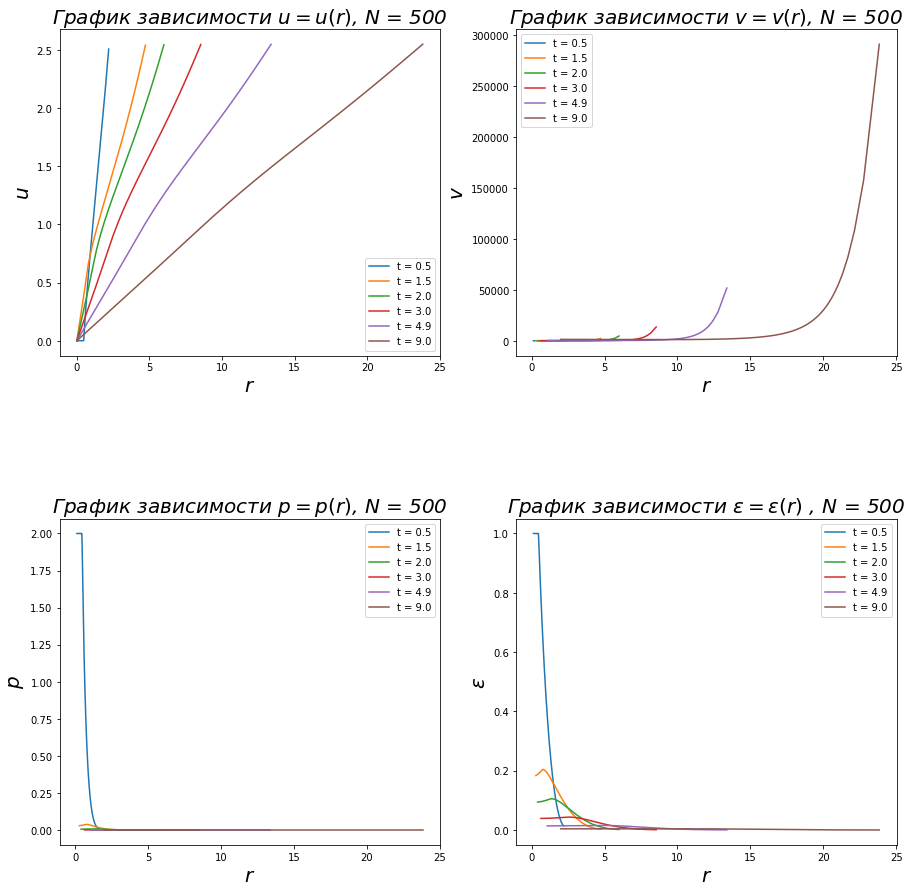

In [163]:
show_res(rs1, [int(tm / t_step) for tm in [.5, 1.5, 2, 3, 4.9, 9]])

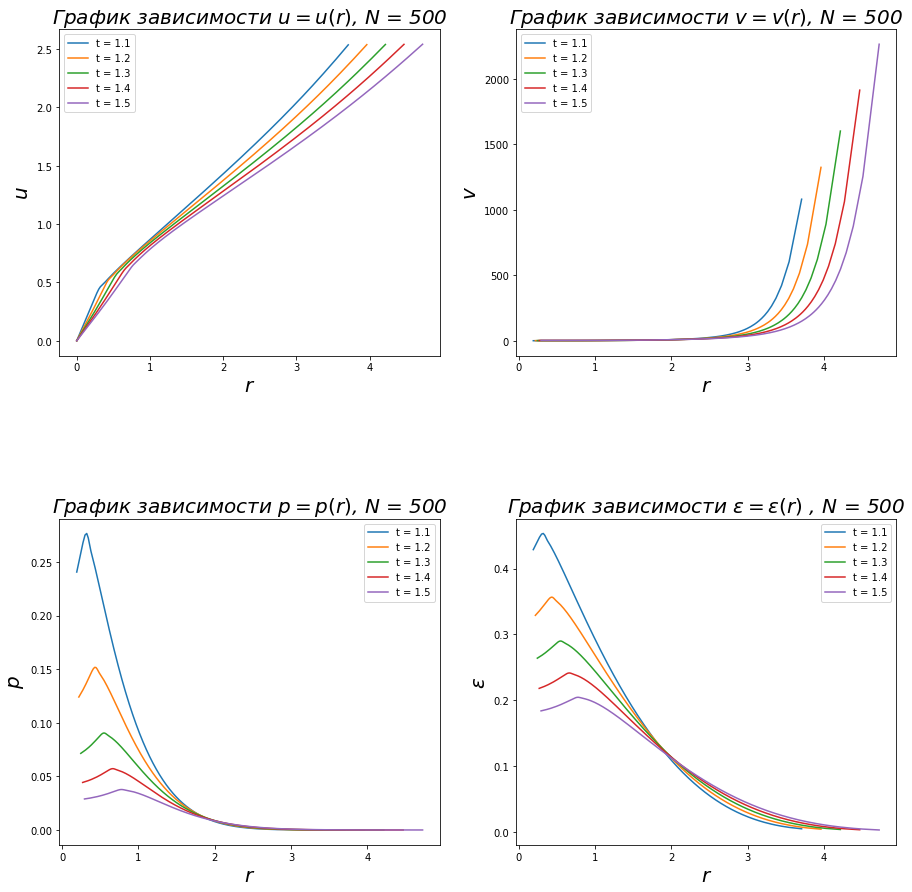

In [158]:
show_res(rs1, [int(tm / t_step) for tm in [1.1, 1.2, 1.3, 1.4, 1.5]])

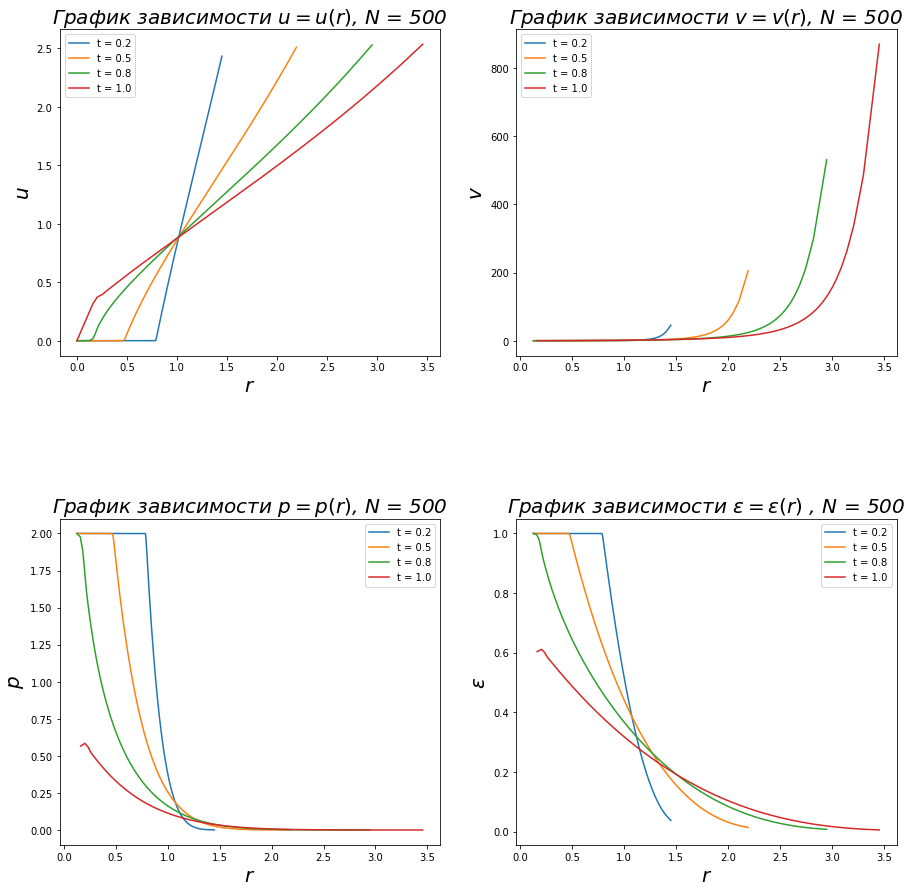

In [164]:
show_res(rs1, [int(tm / t_step) for tm in [.2, .5, .8, 1]])

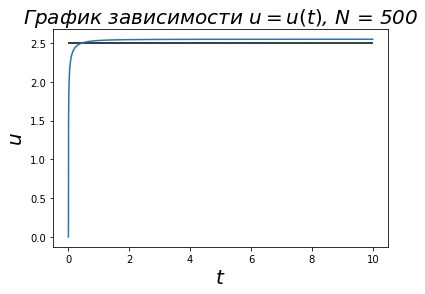

In [160]:
### Limit u
plt.plot([i * t_step for i in range(rs1['Nstep'])], [rs1['u'].get(i, rs1['N']) for i in range(rs1['Nstep'])])
plt.hlines(y = 2.5, xmin = 0, xmax = rs1['Nstep'] * t_step)
plt.title('График зависимости $ u = u(t) $, N = ' + str(rs1['N']), fontstyle = 'oblique', fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.ylabel('$u$',  fontsize = 20)
plt.savefig('C:/111/Dropbox/VitaZhik/study/MIPT/MASTER/ded/task1/u_' + str(rs1['N']))

In [166]:
## проверка выполнения законов сохранения, сравнение с теоретическим значением
Nstep = rs1['Nstep']
N = rs1['N']
k = 0
law1 = []
law2 = []
for n in range(0, Nstep):
    k = 0
    for i in range(N):
        k = k + (rs1['r'].get(Nstep, i + 1) ** 3 - rs1['r'].get(Nstep, i) ** 3) / rs1['v'].get(Nstep, i + .5)
    law1.append(k)
#     print('law 1', k)

    k = 0
    for i in range(N):
        k = k + (rs1['e'].get(Nstep, i + .5) + .5 * rs1['u'].get(Nstep, i + 1) ** 2) * (rs1['r'].get(Nstep, i + 1) ** 3 - rs1['r'].get(Nstep, i) ** 3) / rs1['v'].get(Nstep, i + .5)
    law2.append(k)
#     print('law 2', k)

In [ ]:
plt.scatter(x = np.arange(0, Nstep), y = law1)
plt.title('Закон сохранения масс')
plt.ylabel('масса')
plt.savefig('C:/111/Dropbox/VitaZhik/study/MIPT/MASTER/ded/task1/law1')

In [ ]:
plt.scatter(x = np.arange(0, Nstep), y = law2)
plt.title('Закон сохранения энергии')
plt.ylabel('энергия')
plt.savefig('C:/111/Dropbox/VitaZhik/study/MIPT/MASTER/ded/task1/law2')

In [ ]:
def compare_res(rs1, rs2):
    fig, axs = plt.subplots(2, 2, figsize = (15, 15))
    fig.subplots_adjust(hspace = .5, wspace=.3)
    n = int(rs1['u'].nmax)
    axs[0, 0].plot([rs1['r'].get(n, i) for i in range(rs1['N']+1)], [rs1['u'].get(n - .5, i) for i in range(rs1['N']+1)], label = 'N = ' + str(rs1['N']))
    axs[0, 0].plot([rs2['r'].get(n, i) for i in range(rs2['N']+1)], [rs2['u'].get(n - .5, i) for i in range(rs2['N']+1)], label = 'N = ' + str(rs2['N']))
    axs[0, 0].set_title('График зависимости $ u = u(r) $', fontstyle = 'oblique', fontsize = 20)
    axs[0, 0].set_xlabel('$r$', fontsize = 20)
    axs[0, 0].set_ylabel('$u$',  fontsize = 20)
    axs[0, 0].legend()
    
    axs[0, 1].plot([rs1['r'].get(n, i) for i in range(1, rs1['N']+1)], [rs1['v'].get(n, i -.5) for i in range(1, rs1['N']+1)], label = 'N = ' + str(rs1['N']))
    axs[0, 1].plot([rs2['r'].get(n, i) for i in range(1, rs2['N']+1)], [rs2['v'].get(n, i -.5) for i in range(1, rs2['N']+1)],label = 'N = ' + str(rs2['N']))
    axs[0, 1].set_title('График зависимости $ v = v(r) $', fontstyle = 'oblique', fontsize = 20)
    axs[0, 1].set_xlabel('$r$', fontsize = 20)
    axs[0, 1].set_ylabel('$v$',  fontsize = 20)
    axs[0, 1].legend()
    
    axs[1, 0].plot([rs1['r'].get(n, i) for i in range(1, rs1['N']+1)], [rs1['p'].get(n, i - .5) for i in range(1, rs1['N']+1)],  label = 'N = ' + str(rs1['N']))
    axs[1, 0].plot([rs2['r'].get(n, i) for i in range(1, rs2['N']+1)], [rs2['p'].get(n, i - .5) for i in range(1, rs2['N']+1)],  label = 'N = ' + str(rs2['N']))
    axs[1, 0].set_title('График зависимости $ p = p(r) $', fontstyle = 'oblique', fontsize = 20)
    axs[1, 0].set_xlabel('$r$', fontsize = 20)
    axs[1, 0].set_ylabel('$p$',  fontsize = 20)
    axs[1, 0].legend()


    axs[1, 1].plot([rs1['r'].get(n, i) for i in range(1, rs1['N']+1)], [rs1['e'].get(n, i - .5) for i in range(1, rs1['N']+1)],  label = 'N = ' + str(rs1['N']))
    axs[1, 1].plot([rs2['r'].get(n, i) for i in range(1, rs2['N']+1)], [rs2['e'].get(n, i - .5) for i in range(1, rs2['N']+1)],  label = 'N = ' + str(rs2['N']))
    axs[1, 1].set_title('График зависимости $ \epsilon = \epsilon(r) $', fontstyle = 'oblique', fontsize = 20)
    axs[1, 1].set_xlabel('$r$', fontsize = 20)
    axs[1, 1].set_ylabel('$\epsilon$',  fontsize = 20)
    axs[1, 1].legend()
    plt.savefig('C:/111/Dropbox/VitaZhik/study/MIPT/MASTER/ded/task1/convergence_network')
    plt.show()

In [ ]:
compare_res(rs1, rs2)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


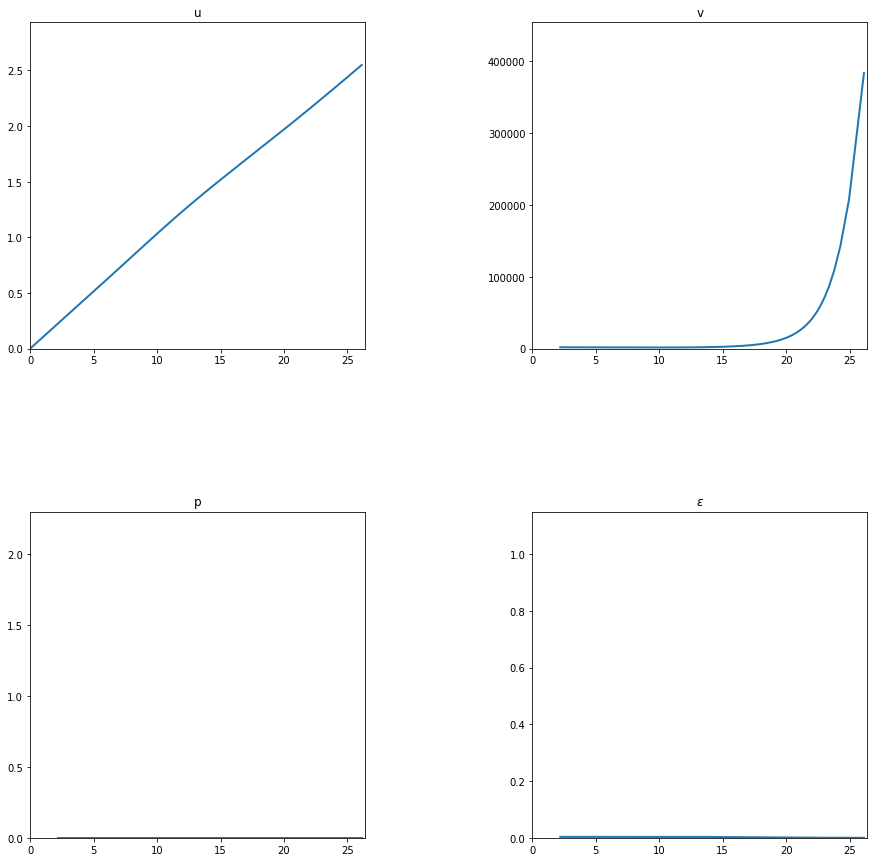

In [171]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 15))
fig.subplots_adjust(hspace = .5, wspace = .5)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2)
line3, = ax3.plot([], [], lw=2)
line4, = ax4.plot([], [], lw=2)
ax1.set_xlim(0, np.max(rs1['r'].arr))
ax2.set_xlim(0, np.max(rs1['r'].arr))
ax3.set_xlim(0, np.max(rs1['r'].arr))
ax4.set_xlim(0, np.max(rs1['r'].arr))
   
ax1.set_ylim(0, 1.15 * np.max(rs1['u'].arr))
ax2.set_ylim(0, 1.15 * np.max(rs1['v'].arr))
ax3.set_ylim(0, 1.15 * np.max(rs1['p'].arr))
ax4.set_ylim(0, 1.15 * np.max(rs1['e'].arr))

ax1.set_title('u')
ax2.set_title('v')
ax3.set_title('p')
ax4.set_title('$\epsilon$')

def init():
    animate(0)
    return line1, line2, line3, line4,
def animate(n2):
    n = n2 * 1000
    N = rs1['N']
    line1.set_data([rs1['r'].get(n, i) for i in range(N+1)], [rs1['u'].get(n + .5, i) for i in range(N+1)])
    line2.set_data([rs1['r'].get(n, i) for i in range(1, N+1)], [rs1['v'].get(n, i -.5) for i in range(1, N+1)])
    line3.set_data([rs1['r'].get(n, i) for i in range(1, N+1)], [rs1['p'].get(n, i - .5) for i in range(1, N+1)])
    line4.set_data([rs1['r'].get(n, i) for i in range(1, N+1)], [rs1['e'].get(n, i - .5) for i in range(1, N+1)])
    return line1, line2, line3, line4,
anim = FuncAnimation(fig, animate, init_func = init, 
                               frames=int(rs1['Nstep']/1000), interval=10, blit=True)
anim.save('C:/111/Dropbox/VitaZhik/study/MIPT/MASTER/ded/task1/animation.gif', writer='imagemagick')